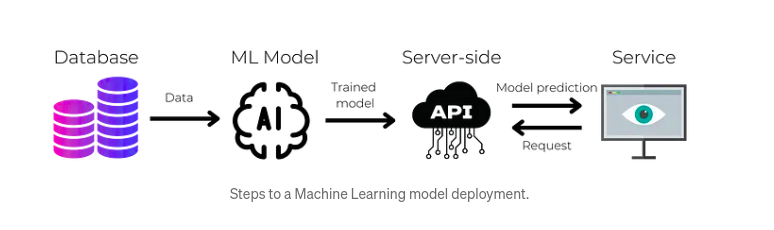

In [12]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Read wine data
wine_df = pd.read_csv('winequality-red.csv')
#Check the fist five rows
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
#Check the columns in the dataset
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

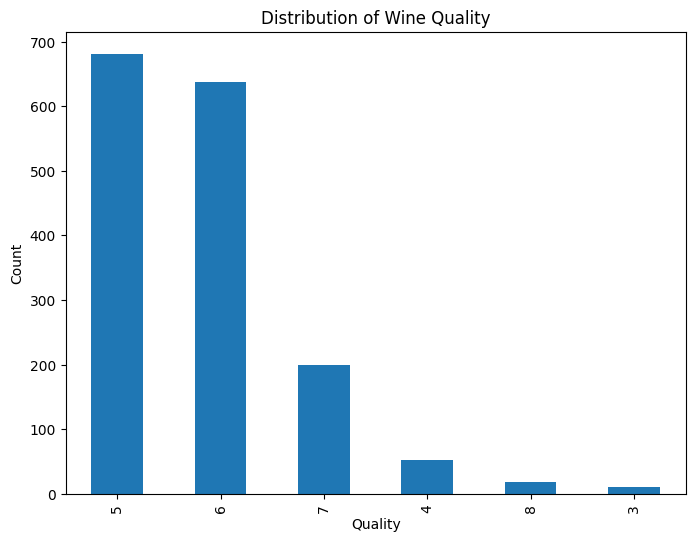

In [13]:
# Bar plot of quality counts
plt.figure(figsize=(8, 6))
wine_df['quality'].value_counts().plot(kind='bar')
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

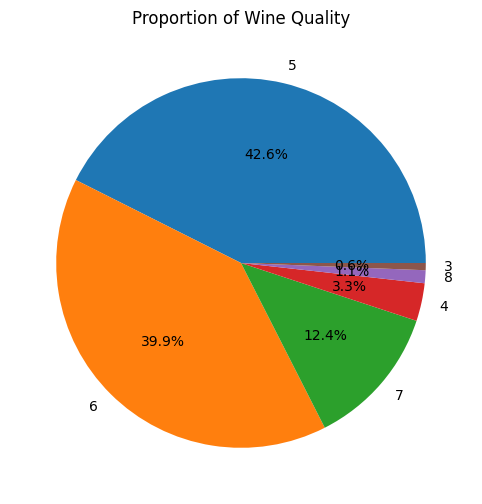

In [14]:
# Pie chart of quality proportions
plt.figure(figsize=(8, 6))
wine_df['quality'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Wine Quality')
plt.ylabel('')
plt.show()


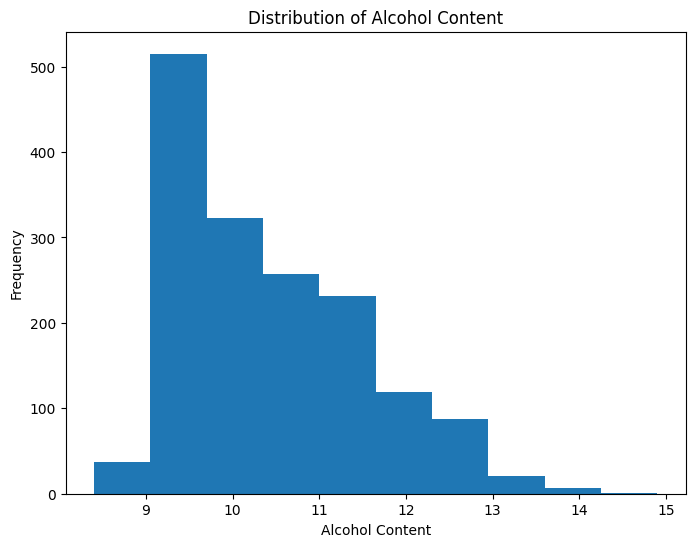

In [15]:
# Histogram of alcohol content
plt.figure(figsize=(8, 6))
plt.hist(wine_df['alcohol'], bins=10)
plt.title('Distribution of Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Frequency')
plt.show()

In [3]:
# Separate feature and target columns
X = wine_df.drop("quality", axis=1)
y = wine_df["quality"].apply(lambda y_value:1 if y_value>=6 else 0)

In [4]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [5]:
# Fit the scaler with only training data
scaler = StandardScaler().fit(X_train.values)

In [6]:
# Scale both the training and test data.
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [7]:
# Train the model with the scaled data
model = LogisticRegression(random_state=42).fit(X_train_scaled, y_train)


In [8]:
# Predict the test data, compare with the real values and print the classification report
y_pred = model.predict(X_test_scaled)

In [9]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.69      0.74      0.71       213
           1       0.78      0.73      0.76       267

    accuracy                           0.74       480
   macro avg       0.73      0.74      0.73       480
weighted avg       0.74      0.74      0.74       480



In [10]:
from pickle import dump
# Save the model in the same folder
dump(model, open('model.pkl', 'wb'))

# Save the scaler in the same folder
dump(scaler, open('scaler.pkl', 'wb'))